# Summary

## Actions
* Created a variable for when a security deposit is required
* Bundled misc property types in 'other' category
* Created new features based on the amenities text field
* Removed 'zipcode', 'availability_60', 'availability_90', 'bed_type', 'host_has_profile_pic', 'requires_license'
* One-hot-encoded all categorical features
* Imputed all missing values with the median value
* Log transformed the price target

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Summary" data-toc-modified-id="Summary-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Summary</a></span><ul class="toc-item"><li><span><a href="#Actions" data-toc-modified-id="Actions-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Actions</a></span></li></ul></li><li><span><a href="#Create-Variables" data-toc-modified-id="Create-Variables-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Create Variables</a></span></li><li><span><a href="#Category-Encoding" data-toc-modified-id="Category-Encoding-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Category Encoding</a></span></li><li><span><a href="#Imputing" data-toc-modified-id="Imputing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Imputing</a></span></li><li><span><a href="#Target-Transformation" data-toc-modified-id="Target-Transformation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Target Transformation</a></span></li></ul></div>

In [1]:
# Import needed libraries
import seaborn as sns
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

plt.style.use('fivethirtyeight')

# Display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df = pd.read_pickle('data/listings_cleaned.pkl')

In [2]:
X = df.drop(columns='price',axis=1)
y = df.price

# Create Variables

In [3]:
# Create security_deposit_required boolean feature then drop security_deposit column
list_sec = df['security_deposit']
sd = []
for row in list_sec:
    if pd.isnull(row):
        sd.append(0.0)
    else:
        sd.append(1.0)
df['security_deposit_required'] = sd
df = df.drop('security_deposit',axis=1)

In [4]:
# Create an "Other" Category
cat_rename = ['Boat','Guest suite','Boutique hotel','Tent','Serviced apartment','Castle','Yurt',
              'Vacation home','Treehouse','Hut','Tipi','Earth House','Chalet','In-law',
              'Train','Plane','Island','Cave','Parking Space','Casa particular',
              'Lighthouse','Hostel','Cabin','Camper/RV','Dorm','Villa','Other']
df['property_type'].loc[df['property_type'].isin(cat_rename)] = 'Other'

In [5]:
# Derive new features from the text field 'amenities'
ame = df.amenities.astype('object')
ame_list = ('Internet','Wireless','Kitchen','Free parking','Air conditioning','TV','Pets','Heating')

for am in (ame_list):
    df[am] = ame.str.contains(am)

df = df.drop('amenities',axis=1)

In [6]:
df = df.drop(columns=['zipcode', 'availability_60', 'availability_90', 'bed_type', 'host_has_profile_pic',
                     'requires_license'], axis=1)

# Category Encoding

In [7]:
# Turn categorical into column features
features = ['host_response_time','property_type','room_type','cancellation_policy']
df = pd.get_dummies(df,columns=features,drop_first=True, dtype='bool')

# Imputing

In [8]:
# Function to calculate missing values by column# Funct
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
        columns={0: 'Missing Values', 1: '% of Total Values'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " rows.\n"
          "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [9]:
missing = missing_values_table(df)

Your selected dataframe has 72 columns and 30854 rows.
There are 8 columns that have missing values.


In [10]:
# Impute missing instances with the median
for col in missing.index:
    try:
        df[col] = df[col].fillna(df[col].median())
    except:
        pass

# Target Transformation

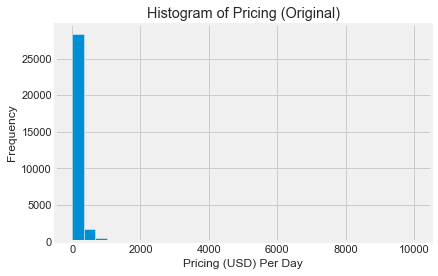

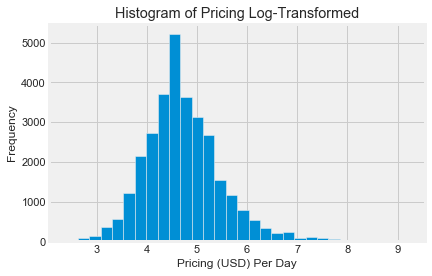

In [11]:
# log transform the response 'price'
df['price_log'] = df['price'].apply(lambda x: math.log(x+1))

# visualize distribution of price (target variable)
plt.hist(df['price'], bins=30)
plt.title("Histogram of Pricing (Original)")
plt.xlabel("Pricing (USD) Per Day")
plt.ylabel("Frequency")
plt.show()

# visualize distribution of price (target variable)
plt.hist(df['price_log'], bins=30)
plt.title("Histogram of Pricing Log-Transformed")
plt.xlabel("Pricing (USD) Per Day")
plt.ylabel("Frequency")
plt.show()

In [12]:
df.to_pickle('data/listings_cleaned_processed.pkl')